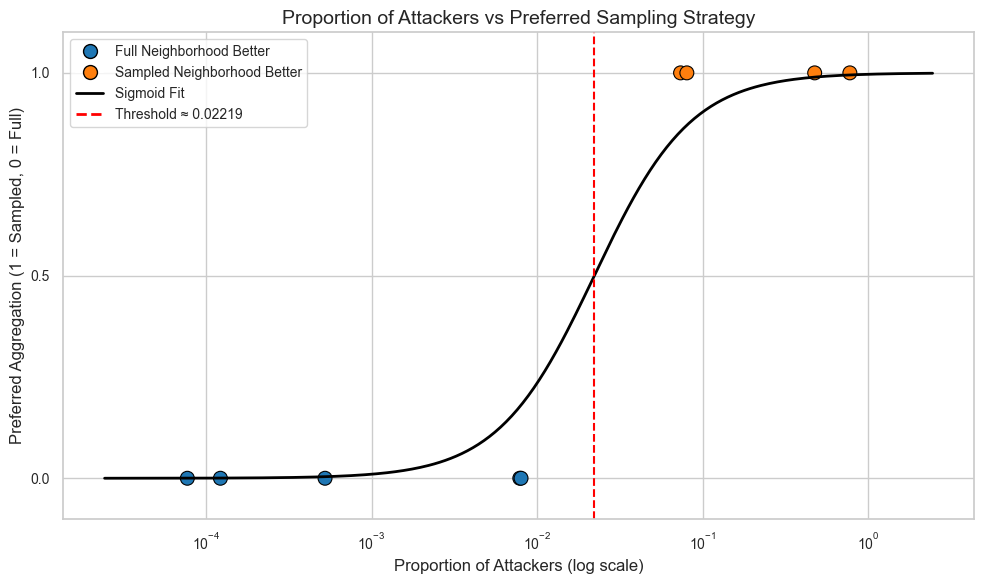

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib.lines import Line2D

# Data: Proportion of attackers (x) and which model performs better (y)
x = np.array([
    0.000077,
    0.000122,
    0.000523,
    0.007862,
    0.007998,
    0.073620,
    0.080357,
    0.475728,
    0.776236
])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

# Apply log-transform to the feature for model training
x_log = np.log10(x).reshape(-1, 1)

# Fit logistic regression on log-transformed x
model = LogisticRegression(class_weight='balanced', C=10)
model.fit(x_log, y)

# Prediction range in log-space
x_range_log = np.linspace(x_log.min() - 0.5, x_log.max() + 0.5, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range_log)[:, 1]

# Inverse log10 for plotting in original scale
x_range = 10 ** x_range_log.flatten()

# Compute threshold in log-space and convert back
threshold_log = -model.intercept_[0] / model.coef_[0][0]
threshold = 10 ** threshold_log

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Data points
scatter = sns.scatterplot(x=x, y=y, hue=y, palette=["#1f77b4", "#ff7f0e"],
                          s=100, edgecolor="black", legend=False)

# Logistic regression sigmoid curve
plt.plot(x_range, y_prob, color='black', linewidth=2, label='Sigmoid Fit')

# Threshold line
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ≈ {threshold:.5f}')

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Full Neighborhood Better',
           markerfacecolor='#1f77b4', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Sampled Neighborhood Better',
           markerfacecolor='#ff7f0e', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], color='black', lw=2, label='Sigmoid Fit'),
    Line2D([0], [0], color='red', linestyle='--', lw=2, label=f'Threshold ≈ {threshold:.5f}')
]
plt.legend(handles=legend_elements, fontsize=10)

# Log scale for x-axis
plt.xscale('log')

# Labels and styling
plt.title("Proportion of Attackers vs Preferred Sampling Strategy", fontsize=14)
plt.xlabel("Proportion of Attackers (log scale)", fontsize=12)
plt.ylabel("Preferred Aggregation (1 = Sampled, 0 = Full)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([0, 0.5, 1], fontsize=10)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()


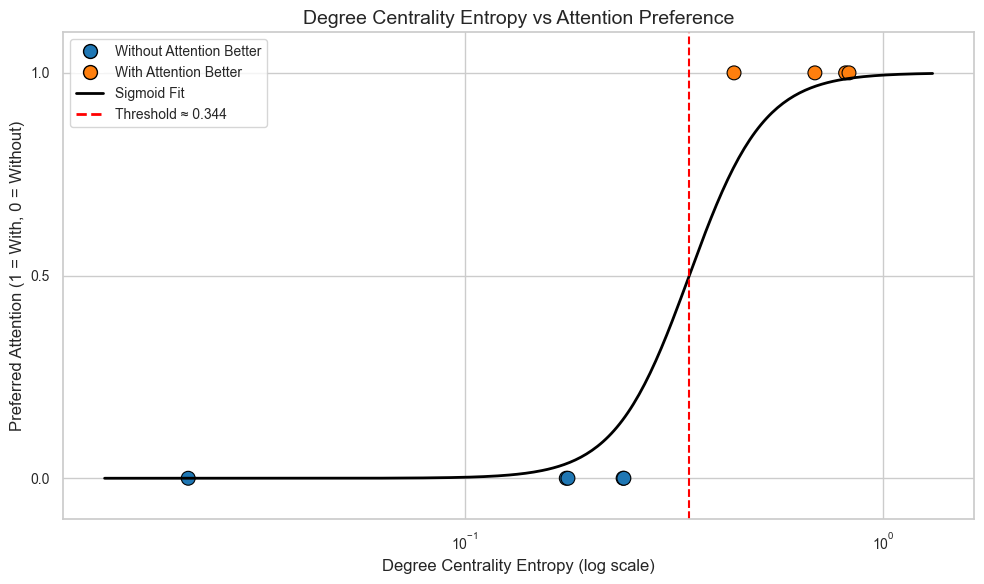

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib.lines import Line2D

# Data extracted from the table
# Degree centrality entropy
x = np.array([
    0.021798,  # Edge-IIoTset
    0.174882,  # CIC-ToN-IoT
    0.176466,  # CIC-ToN-IoT-Snapshot
    0.239182,  # NF-CSE-CIC-IDS2018
    0.240163,  # NF-UQ-NIDS
    0.440548,  # CIC-IDS-2017
    0.687675,  # NF-UQ-NIDS-Unified-Community
    0.814577,  # CCD-INID-Centrality-Focused
    0.829736   # X-IIoTID
])

# Labels: 0 = Without Attention Better, 1 = Attention Better
y = np.array([
    0,  # Edge-IIoTset
    0,  # CIC-ToN-IoT
    0,  # CIC-ToN-IoT-Snapshot
    0,  # NF-CSE-CIC-IDS2018
    0,  # NF-UQ-NIDS
    1,  # CIC-IDS-2017
    1,  # NF-UQ-NIDS-Unified-Community
    1,  # CCD-INID-Centrality-Focused
    1   # X-IIoTID
])

# Log-transform for training
x_log = np.log10(x).reshape(-1, 1)

# Fit logistic regression
model = LogisticRegression(class_weight='balanced', C=100)
model.fit(x_log, y)

# Generate curve
x_range_log = np.linspace(x_log.min() - 0.2, x_log.max() + 0.2, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range_log)[:, 1]
x_range = 10 ** x_range_log.flatten()

# Threshold
threshold_log = -model.intercept_[0] / model.coef_[0][0]
threshold = 10 ** threshold_log

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(x=x, y=y, hue=y, palette=["#1f77b4", "#ff7f0e"],
                s=100, edgecolor="black", legend=False)

# Sigmoid curve
plt.plot(x_range, y_prob, color='black', linewidth=2, label='Sigmoid Fit')

# Threshold line
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ≈ {threshold:.3f}')

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Without Attention Better',
           markerfacecolor='#1f77b4', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='With Attention Better',
           markerfacecolor='#ff7f0e', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], color='black', lw=2, label='Sigmoid Fit'),
    Line2D([0], [0], color='red', linestyle='--', lw=2, label=f'Threshold ≈ {threshold:.3f}')
]
plt.legend(handles=legend_elements, fontsize=10)

# Log scale
plt.xscale('log')

# Labels
plt.title("Degree Centrality Entropy vs Attention Preference", fontsize=14)
plt.xlabel("Degree Centrality Entropy (log scale)", fontsize=12)
plt.ylabel("Preferred Attention (1 = With, 0 = Without)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([0, 0.5, 1], fontsize=10)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()
